In [226]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from polyfit import *
import pandas as pd
from cross_validation import *
import seaborn as sbn

In [227]:
df =pd.read_csv('./train.csv',parse_dates=True,index_col='id')
df=df.sort_values(by='id')
df.reset_index(inplace=True)
df.head(3)


,id,value
0,2004-11-01,0.5992
1,2005-01-01,-1.2773
2,2005-02-01,8.9098


In [228]:
df['year'] = [d.year -2000 for d in df.id]
df['month'] = [d.month-1 for d in df.id]
df.head()


,id,value,year,month
0,2004-11-01,0.5992,4,10
1,2005-01-01,-1.2773,5,0
2,2005-02-01,8.9098,5,1
3,2005-03-01,14.0236,5,2
4,2005-04-01,23.9407,5,3


In [229]:
x_y = np.array(df['year']) 
x_m = np.array(df['month']) 
T = np.array(df['value'])
x_t = np.array(((x_y)*12 +x_m),dtype=int)
df['time']= x_t
df.head()

,id,value,year,month,time
0,2004-11-01,0.5992,4,10,58
1,2005-01-01,-1.2773,5,0,60
2,2005-02-01,8.9098,5,1,61
3,2005-03-01,14.0236,5,2,62
4,2005-04-01,23.9407,5,3,63


In [230]:
df.head()

,id,value,year,month,time
0,2004-11-01,0.5992,4,10,58
1,2005-01-01,-1.2773,5,0,60
2,2005-02-01,8.9098,5,1,61
3,2005-03-01,14.0236,5,2,62
4,2005-04-01,23.9407,5,3,63


## Multi linear regression models

In [231]:
months=[[] for i in range(0,12)] # month[i] represent the index of month_i in x3 labels of ith months
for i in range (0,len(x_t)):
    months[(x_t[i]%12)].append(i)   
months


[[1, 24, 35, 46, 57, 68, 79, 90, 101],
 [2, 13, 36, 47, 58, 69, 80, 91, 102],
 [3, 14, 25, 48, 59, 70, 81, 92, 103],
 [4, 15, 26, 37, 60, 71, 82, 93, 104],
 [5, 16, 27, 38, 49, 72, 83, 94, 105],
 [6, 17, 28, 39, 50, 61, 73, 84, 95],
 [7, 18, 29, 40, 51, 62, 85, 96, 106],
 [8, 19, 30, 41, 52, 63, 74, 97, 107],
 [9, 20, 31, 42, 53, 64, 75, 86, 108],
 [10, 21, 32, 43, 54, 65, 76, 87, 98, 109],
 [0, 11, 22, 33, 44, 55, 66, 77, 88, 99],
 [12, 23, 34, 45, 56, 67, 78, 89, 100]]

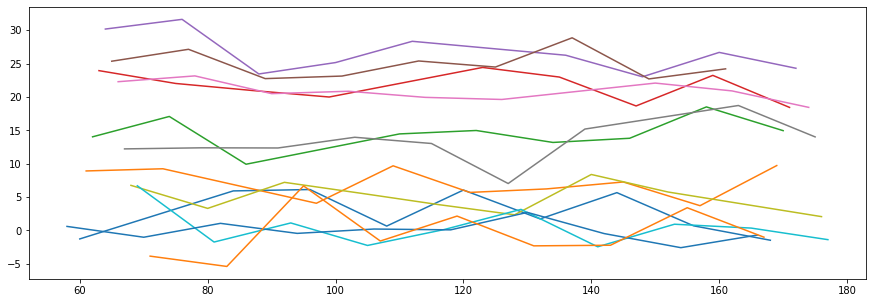

In [232]:

plt.figure(figsize=(15,5))
for i in range(0,12):
    
    plt.plot(x_t[np.array(months[i])],T[np.array(months[i])])
plt.show()

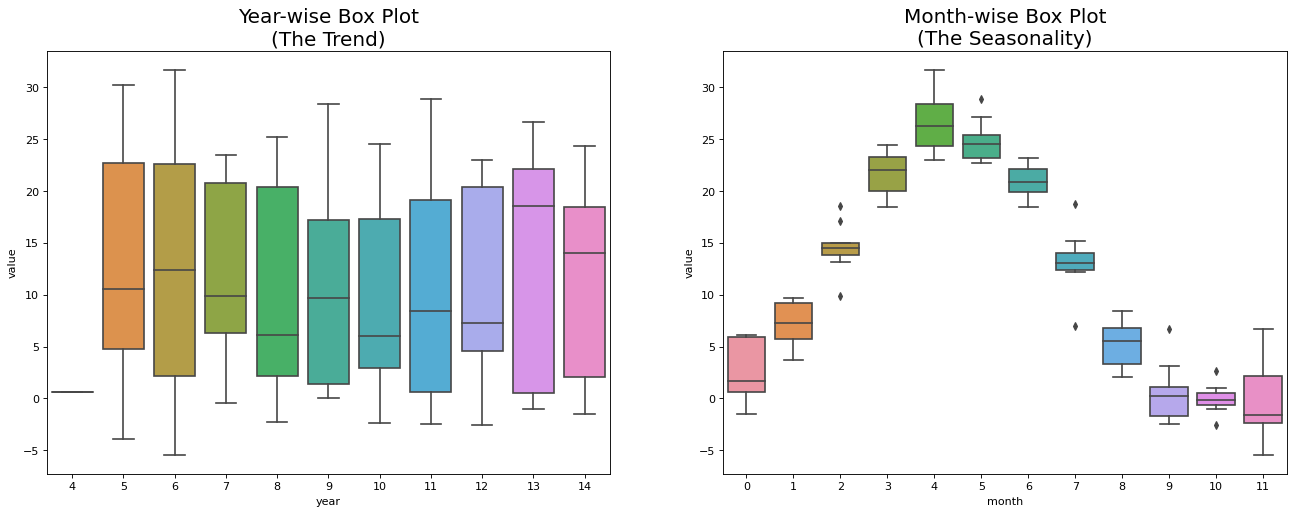

In [233]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sbn.boxplot(x='year', y='value', data=df, ax=axes[0])
sbn.boxplot(x='month', y='value', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()


# Lets train the models for each month , since each month has a cyclic trend over the period of time

 Train all the models separately find best fit for each of the model

In [234]:
X=np.array(x_t)
T=np.reshape(T,(-1))
X[months[0]]

array([ 60,  84,  96, 108, 120, 132, 144, 156, 168])

## January

In [236]:
# Tuning the hyper-paramters -> degree of polynomial
# fig,axes = plt.subplots(nrows=)
df_jan = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 4, 1)
lmda = [10**i for i in range(3, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(degree,lm)
        train_err, test_err = shuffled_cvr(
            X[months[0]], T[months[0]], degree=degree, K=4, lmda=lm, method='piv',n_permuatations=40)
        df_jan.loc[-1] = {'lmda': np.log10(lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        df_jan.index = df_jan.index + 1
        df_jan = df_jan.sort_index()

df_jan.sort_values('test_err')


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
17,1.0,1,2.433996,1.287326
20,2.0,1,2.465415,1.509289
19,2.0,2,2.485550,1.506725
18,2.0,3,2.495738,1.504042
21,3.0,3,2.498585,1.550862
22,3.0,2,2.515082,1.552702
23,3.0,1,2.555432,1.555070
16,1.0,2,2.563985,1.263481
15,1.0,3,2.636124,1.256705
14,0.0,1,2.937970,1.103672


# Feburary


In [242]:
df_feb = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(2,-5,-1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[1]]
        y_train = T[months[1]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=4, lmda=lm, method='piv')
        df_feb.loc[-1] = {'lmda': (lm), 'degree': degree,
                          'test_err': test_err, 'train_err': train_err}
        df_feb.index = df_feb.index + 1
        df_feb = df_feb.sort_index()

df_feb=df_feb.sort_values('test_err')

df_feb.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
14,0.01,1,1.942950,0.827865
9,0.001,1,2.024057,0.842371
4,0.0001,1,2.045963,0.835910
24,1,1,2.076707,0.883976
18,0.1,2,2.096093,0.858221
11,0.01,4,2.128412,0.881656
1,0.0001,4,2.135467,0.908648
19,0.1,1,2.145672,0.840494
16,0.1,4,2.189335,0.864863
23,1,2,2.189660,0.900892


# March

In [245]:
df_march = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(3, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[2]]
        y_train = T[months[2]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=4, lmda=lm, method='piv',n_permuatations=40)
        df_march.loc[-1] = {'lmda': (lm), 'degree': degree,
                          'test_err': test_err, 'train_err': train_err}
        df_march.index = df_march.index + 1
        df_march = df_march.sort_index()

df_march = df_march.sort_values('test_err')

df_march.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
19,0.1,1,1.963199,0.818101
14,0.01,1,1.975527,0.824957
17,0.1,3,1.996463,0.822855
7,0.001,3,2.018467,0.824736
4,0.0001,1,2.024451,0.824605
18,0.1,2,2.062746,0.819299
8,0.001,2,2.067404,0.819848
3,0.0001,2,2.079133,0.821316
13,0.01,2,2.090024,0.824434
9,0.001,1,2.094019,0.818202


# April

In [246]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(1, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[3]]
        y_train = T[months[3]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=4, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                          'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
18,0.1,2,1.829492,0.804169
3,0.0001,2,1.847873,0.791020
14,0.01,1,1.855285,0.796234
4,0.0001,1,1.861908,0.810864
19,0.1,1,1.866250,0.792217
13,0.01,2,1.882837,0.795244
8,0.001,2,1.886440,0.803370
9,0.001,1,1.896422,0.809056
17,0.1,3,1.915267,0.806367
7,0.001,3,1.931276,0.818706


# May

In [249]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(2, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[4]]
        y_train = T[months[4]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(20)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
7,0.001,3,2.154785,0.925530
2,0.0001,3,2.184080,0.919684
11,0.01,4,2.265523,0.966989
6,0.001,4,2.287646,0.964704
14,0.01,1,2.297485,0.944544
19,0.1,1,2.300959,0.936752
9,0.001,1,2.303196,0.936904
17,0.1,3,2.303285,0.920859
13,0.01,2,2.304710,0.939233
12,0.01,3,2.326637,0.922131


# June

In [286]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(1, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[5]]
        y_train = T[months[5]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
19,0.1,1,1.529072,0.778163
4,0.0001,1,1.589334,0.769192
9,0.001,1,1.659263,0.772344
14,0.01,1,1.679481,0.767644
12,0.01,3,1.742235,0.772387
3,0.0001,2,1.748197,0.776577
2,0.0001,3,1.787870,0.773248
7,0.001,3,1.794951,0.774839
18,0.1,2,1.797498,0.792474
13,0.01,2,1.852837,0.768241


# July

In [253]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(1, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[6]]
        y_train = T[months[6]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=4, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
19,0.1,1,1.065847,0.474867
9,0.001,1,1.093220,0.488798
4,0.0001,1,1.106522,0.479571
18,0.1,2,1.107992,0.483480
14,0.01,1,1.111874,0.486159
13,0.01,2,1.164192,0.491986
3,0.0001,2,1.165571,0.497106
8,0.001,2,1.167653,0.498777
17,0.1,3,1.188408,0.500611
2,0.0001,3,1.218776,0.493129


# August

In [257]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(1, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[7]]
        y_train = T[months[7]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
4,0.0001,1,2.558191,1.000426
9,0.001,1,2.594611,1.001173
19,0.1,1,2.624854,0.997793
12,0.01,3,2.633428,1.051681
18,0.1,2,2.672069,0.993625
14,0.01,1,2.682155,1.000004
8,0.001,2,2.686180,0.997860
13,0.01,2,2.691791,0.992330
2,0.0001,3,2.692530,1.034536
7,0.001,3,2.697709,1.059949


# September

In [259]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(4, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[8]]
        y_train = T[months[8]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
24,1,1,1.917783,0.780691
23,1,2,1.968723,0.792080
4,0.0001,1,2.029717,0.786611
21,1,4,2.060120,0.789816
19,0.1,1,2.081637,0.782444
22,1,3,2.085186,0.788817
14,0.01,1,2.113878,0.777958
18,0.1,2,2.123227,0.790809
9,0.001,1,2.132209,0.781813
16,0.1,4,2.173096,0.787248


# October

In [262]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(5, -8, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[9]]
        y_train = T[months[9]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


,lmda,degree,test_err,train_err
55,10000,5,1.606043,0.940005
61,100000,4,1.619000,0.940496
58,10000,2,1.620016,0.940160
54,1000,1,1.625199,0.939445
59,10000,1,1.626924,0.940430
50,1000,5,1.627239,0.937575
53,1000,2,1.628791,0.938527
64,100000,1,1.629876,0.941165
60,100000,5,1.630476,0.940903
62,100000,3,1.630592,0.941420


# November

In [264]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(5, -5, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[10]]
        y_train = T[months[10]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=40)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


,lmda,degree,test_err,train_err
30,100,5,0.764881,0.444136
33,100,2,0.788603,0.454679
32,100,3,0.789423,0.451818
31,100,4,0.792346,0.448445
36,1000,4,0.792818,0.460162
48,100000,2,0.793043,0.461907
47,100000,3,0.794497,0.461540
49,100000,1,0.796964,0.462598
40,10000,5,0.797139,0.461786
38,1000,2,0.798658,0.461456


# December

In [293]:
dd = pd.DataFrame(columns=['lmda', 'degree', 'test_err', 'train_err'])
# df.head()
posssible_degree = np.arange(1, 6, 1)
lmda = [10**i for i in range(4, -2, -1)]
# lmda.append(0)
for lm in lmda:
    for degree in posssible_degree:
        # print(months[1], months[1])
        x_train = X[months[11]]
        y_train = T[months[11]]
        # print(x_train)
        train_err, test_err = shuffled_cvr(
            x_train, y_train, degree=degree, K=5, lmda=lm, method='piv',n_permuatations=10)
        dd.loc[-1] = {'lmda': (lm), 'degree': degree,
                      'test_err': test_err, 'train_err': train_err}
        dd.index = dd.index + 1
        dd = dd.sort_index()

dd = dd.sort_values('test_err')

dd.head(10)


/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


,lmda,degree,test_err,train_err
24,1000,1,2.447071,1.345121
25,10000,5,2.467739,1.344577
21,1000,4,2.476562,1.342641
29,10000,1,2.479258,1.345468
23,1000,2,2.521494,1.344968
28,10000,2,2.574905,1.348675
27,10000,3,2.580813,1.346178
19,100,1,2.581077,1.336064
26,10000,4,2.604381,1.348209
20,1000,5,2.609638,1.345965


In [294]:
month_degrees= [2,1,1,2,3,1,1,1,1,2,2,1]
lmda=[1e1,1e-1,1e-1,1e-1,1e-3,1e-1,1e-1,1e-3,1e0,1e4,1e2,1e3]

In [297]:
new_models=[]
for i in range(0,12):
    #train the ith month model by fitting a polyfit 
    X_train = x_t[months[i]]
    t = T[months[i]]
    model=polyfit(degree=month_degrees[i],lmda=np.float64(lmda[i]),method='piv')
    model.fit(X_train,t)
    new_models.append(model)

In [298]:
model_error = [model.score_rms(model.X,model.T) for model in new_models]
# rmse = np.sqrt(np.sum(model_error))/len(x_t)
print(model_error)
# rmse

[0.16552321780361476, 0.11054319720903337, 0.10593678057196432, 0.0951191483720206, 0.12366151443547026, 0.10573235258281626, 0.06100587209129161, 0.12440398725254993, 0.09209308360202358, 0.12373749208022551, 0.07118382022209785, 0.15319010663596172]


In [276]:
df_test = pd.read_csv('./test.csv', parse_dates=True, index_col='id')

df_test.reset_index(inplace=True)
df_test.head(3)


,id
0,2010-05-01
1,2009-04-01
2,2013-09-01


In [277]:
df_test['year'] = [d.year -2000 for d in df_test.id]
df_test['month'] = [d.month-1 for d in df_test.id]
df_test.head()


,id,year,month
0,2010-05-01,10,4
1,2009-04-01,9,3
2,2013-09-01,13,8
3,2006-01-01,6,0
4,2007-02-01,7,1


In [278]:
x_y_t = np.array(df_test['year']) 
x_m_t = np.array(df_test['month']) 

x_tt = np.array(((x_y_t)*12 +x_m_t),dtype=int)
df_test['time']= x_tt
df_test.head()

,id,year,month,time
0,2010-05-01,10,4,124
1,2009-04-01,9,3,111
2,2013-09-01,13,8,164
3,2006-01-01,6,0,72
4,2007-02-01,7,1,85


In [279]:
x_tt

array([124, 111, 164,  72,  85, 151, 173,  98,  59, 138])

In [299]:
y_pred=[]

for x_test in x_tt:
    k=x_test%12
    y_pred.append(new_models[k].pred(x_test)[0][0])

y_pred

[26.448105471744974,
 21.66078124873699,
 3.8964310884385758,
 2.080178475798266,
 8.190817512327953,
 15.1557850991044,
 21.97768282915918,
 14.06207581170831,
 -0.026592096034140932,
 19.800711407881337]

In [281]:
df_test['y_pred']=y_pred

df_test.head(10)

,id,year,month,time,y_pred
0,2010-05-01,10,4,124,26.448105
1,2009-04-01,9,3,111,21.660781
2,2013-09-01,13,8,164,3.896431
3,2006-01-01,6,0,72,2.080178
4,2007-02-01,7,1,85,8.190818
5,2012-08-01,12,7,151,15.155785
6,2014-06-01,14,5,173,21.977683
7,2008-03-01,8,2,98,14.062076
8,2004-12-01,4,11,59,-0.004493
9,2011-07-01,11,6,138,19.800711


In [300]:
print("id,value")
for d in df_test.values:
    print(str(d[0].month)+'/'+str(d[0].day)+'/'+str(d[0].year-2000)+','+str(d[4]))

id,value
5/1/10,26.448105471744974
4/1/9,21.66078124873699
9/1/13,3.8964310884385758
1/1/6,2.080178475798266
2/1/7,8.190817512327953
8/1/12,15.1557850991044
6/1/14,21.97768282915918
3/1/8,14.06207581170831
12/1/4,-0.004492876139487036
7/1/11,19.800711407881337
